# Intro to Gaussian processes

GPs are a nice tool for probabilistic regression. They allow you to define very general families of functions through multivariate Gaussian distributions. Given some observations, you can *narrow down* those distributions (by conditioning them on the known values). By consistently working with Gaussians, expected values and confidence measures are available throughout via mean and variance.

## Links
- [mathematicalmonk on YouTube](https://www.youtube.com/watch?v=vU6AiEYED9E&list=PLD0F06AA0D2E8FFBA&index=150)
- **TODO** Nando de Freitas on YouTube

## Context and definitions
A random process (aka stochastic process) is a collection of random variables (outputs). In a GP, $n$ elements from some index set $S$ are mapped to random variables $Z_t: t \in S$, and $(Z_{t1}, ..., Z_{tn})$ form a multivariate Gaussian distribution.

### Intuition
Often, the index set $S$ contains points in time. Now all *outputs*—let's call them *states*—associated with a point in time $Z_t$ form a multivariate Gaussian distribution. This means that each *state at some time* of the GP is another *dimension* of the overall Gaussian. The key point of GP is, that an **entire family of $S$ to output mappings** is **described by the characteristics** of this overall distribution. It has some mean $\mu$ and—more importantly—a covariance $K$. The **covariance links** an **output** $Z_i$ to **all other outputs** (in general both past and future).

### Example: random lines
Let's pick some random slope $m \sim \mathcal{N}(0, 1)$ (Gaussian with mean 0 and variance 1). Our index can be any real number, so $S = \mathbb{R}$. If we set our outputs to be

$$
Z_t = mt
$$

we get an overall Gaussian (by the affine property)

$$
(Z_{t0}, Z_{t1}, ...)^T = (t_0, t_1, ...)^T \mathcal{N}(0, 1)
$$

So this process is indeed a GP.

Let's plot some samples from this process the straightforward way. Next up we'll see, how to express this GP through mean and covariance.

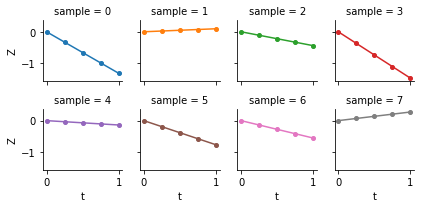

In [10]:
import numpy as np

from utilities import plot_samples

np.set_printoptions(precision=4, suppress=True)


def plot_random_lines():
    ms = np.random.randn(8)
    t = np.linspace(0, 1, 5)
    # Shortcut for computing m*t for each m and t
    lines = np.outer(ms, t)
    plot_samples(t, lines, 4)
    
plot_random_lines()

## Mean and covariance
Remember the key point: *we can express a process like random lines by the $\mu$ and $K$ of a Gaussian distribution*. In general, we let $\mu$ be a function $\mu: S \to \mathbb{R}$. The covariance matrix $K$ is defined by another function, the **kernel**, $k: S \times S \to \mathbb{R}$, such that $K_{ij} = k(t_i, t_j)$. With this, we have defined our overall Gaussian. Note that the covariance of two outputs is defined by a function on their indices: $\mathrm{Cov}(Z_i, Z_j) = k(t_i, t_j)$.

### Random lines revisited
We can re-formulate the random lines process. Its mean function is zero and its covariance function is $k(t_i, t_j) = t_i t_j$. Let's draw some samples from that:

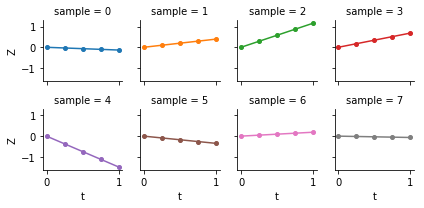

In [11]:
# Ignore the warning if you get one; it's due to numerical
# precision errors. You can modify the function to verify
# that all eigenvalues of C are non-negative or very close
# to zero.

def plot_random_lines_2():
    # Define input set
    t = np.linspace(0, 1, 5)
    # Calculate mu and C
    mu = np.zeros(5)
    C = np.array([[i * j for j in t] for i in t])
    # Draw samples
    lines = np.random.multivariate_normal(mu, C, 8)
    plot_samples(t, lines, 4)
    
    
plot_random_lines_2()

### Intuition
Note that in the example above, we have defined a **multivariate Gaussian**, from which **each sample is a line**! It is shaped such that in each sample $(Z_1, Z_2, Z_3, Z_4, Z_5)^T$ the components *must* form a straight line. For further examples, let's use a simple GP-sampling function.

In [12]:
from utilities import plot_gp

Note that $\mu$ defines your *mean* output or the expected output. The covariance $k$ defines the *shape over time* of the output. Let's see what happens if we give random lines a different mean.

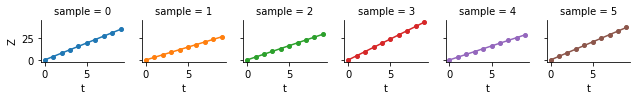

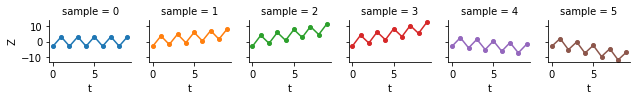

Covariance matrix:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


In [13]:
def plot_linear_variations():
    t = np.arange(10)

    k = lambda i, j: i * j
    
    mu_slope = lambda i: 3 * i
    mu_zigzag = lambda i: 3 * (2 * (i%2) - 1)

    plot_gp(mu_slope, k, t, (1, 6))
    _, C = plot_gp(mu_zigzag, k, t, (1, 6))
    
    print('Covariance matrix:')
    print(C)
    
plot_linear_variations()

It's clear how $\mu$ shapes the possible outputs. In this case our choice of $k$ seems to create an *increasing offset over time* from the mean output. This is reflected in the growing *variance* of the main diagonal elements. The off-diagonal covariance elements impose *constraints* on the distribution such that only linear lines are possible.


## More examples
Here are some more examples of kernels and samples from resulting GPs.

### Gaussian noise
The simplest GP just has $K = \sigma^2 I$. This means that there is no correlation between any two output points and any output has variance $\sigma^2$.

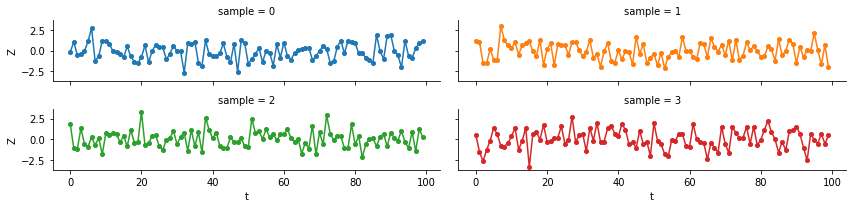

Covariance matrix:
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]]


In [14]:
_, C = plot_gp(lambda i: 0, lambda i, j: 1 if i == j else 0, np.arange(100), (2, 2), (6, 1.5))
print('Covariance matrix:')
print(C)

### Brownian motion
Brownian motion (aka Wiener process) is a GP with kernel $k(i, j) = min(i, j)$.

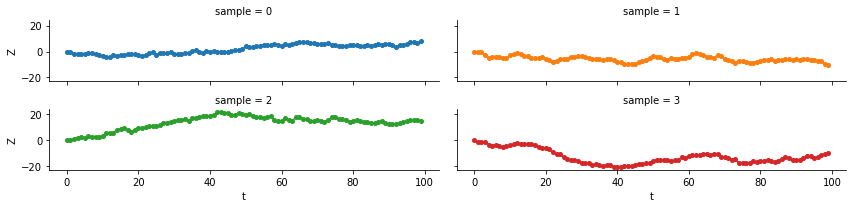

Covariance matrix:
[[ 0  0  0 ...,  0  0  0]
 [ 0  1  1 ...,  1  1  1]
 [ 0  1  2 ...,  2  2  2]
 ..., 
 [ 0  1  2 ..., 97 97 97]
 [ 0  1  2 ..., 97 98 98]
 [ 0  1  2 ..., 97 98 99]]


In [15]:
_, C = plot_gp(lambda i: 0, lambda i, j: min(i, j), np.arange(100), (2, 2), (6, 1.5))
print('Covariance matrix:')
print(C)

### Negative exponential
The negative exponential kernel $k(i,j) = \exp(-|i - j|^2)$. Since it only depends on the distance between inputs, resulting GPs are called *stationary*. Since the absolute value of the distance is used (direction doesn't matter), they're also *isotropic*. 

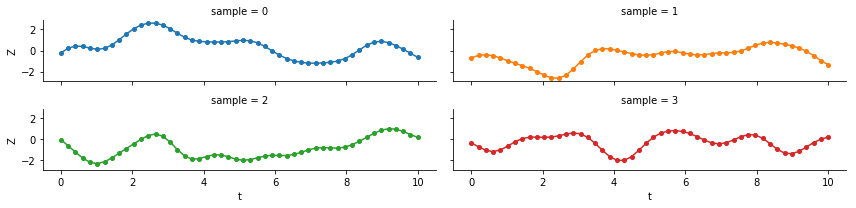

Covariance matrix:
[[ 1.      0.9592  0.8465 ...,  0.      0.      0.    ]
 [ 0.9592  1.      0.9592 ...,  0.      0.      0.    ]
 [ 0.8465  0.9592  1.     ...,  0.      0.      0.    ]
 ..., 
 [ 0.      0.      0.     ...,  1.      0.9592  0.8465]
 [ 0.      0.      0.     ...,  0.9592  1.      0.9592]
 [ 0.      0.      0.     ...,  0.8465  0.9592  1.    ]]


20th line of the covariance matrix:


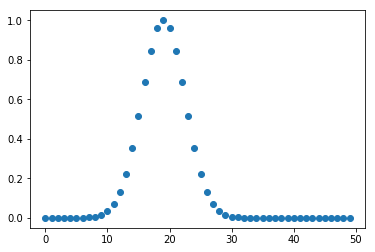

In [16]:
_, C = plot_gp(lambda i: 0, lambda i, j: np.exp(-(i - j)**2), np.linspace(0,10), (2, 2), (6, 1.5))
print('Covariance matrix:')
print(C)

print('\n\n20th line of the covariance matrix:')
import matplotlib.pyplot as plt
plt.plot(C[19, :], marker='o', linestyle='')
plt.show()